# Support Vector Machines (SVM)

- Justin Nguyen
- Rajiv Singireddy

### Set up

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "SVM"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### utility functions

In [2]:
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Synthetic dataset 

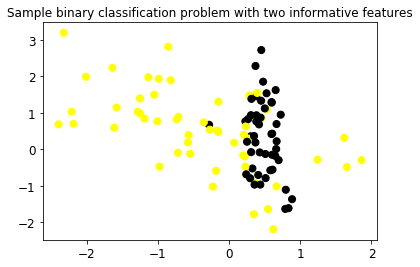

In [3]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, marker= 'o', s=50, cmap=cmap_bold)
plt.show()

### Linear Support Vector Machine

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.64      0.90      0.75        10

    accuracy                           0.76        25
   macro avg       0.78      0.78      0.76        25
weighted avg       0.80      0.76      0.76        25



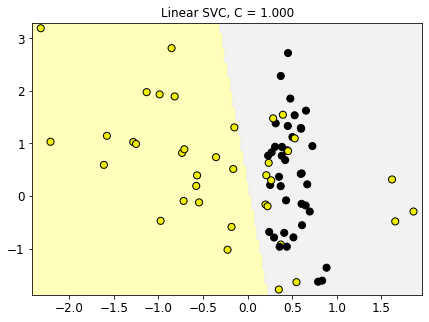

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = SVC(kernel = 'linear', C=1.0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

result_metrics = classification_report(y_test, y_pred)
print(result_metrics)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))

title = 'Linear SVC, C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

### Linear Support Vector Machine: C parameter

- C is regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.64      0.90      0.75        10

    accuracy                           0.76        25
   macro avg       0.78      0.78      0.76        25
weighted avg       0.80      0.76      0.76        25

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.67      0.80      0.73        10

    accuracy                           0.76        25
   macro avg       0.76      0.77      0.76        25
weighted avg       0.77      0.76      0.76        25



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


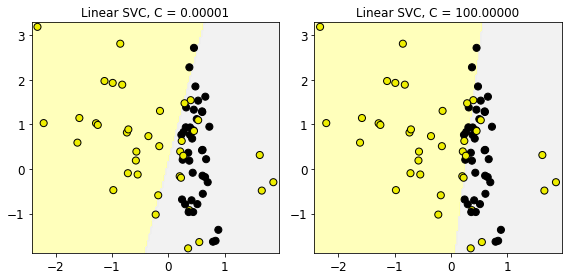

In [5]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
this_C = 1.0

fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C, max_iter=1000).fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    result_metrics = classification_report(y_test, y_pred)
    print(result_metrics)
    
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

### Application to real dataset

### real dataset: breast cancer dataset

In [6]:
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [7]:
### SVM with linear kernel (without kernel)

In [8]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC(max_iter=10000).fit(X_train, y_train)

y_pred = clf.predict(X_test)

result_metrics = classification_report(y_test, y_pred)
print(result_metrics)

print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        53
           1       0.97      0.92      0.94        90

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.95
Accuracy of Linear SVC classifier on test set: 0.93


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Kernelized Support Vector Machines

- More complex synthetic dataset

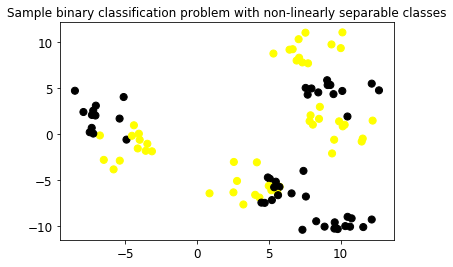

In [9]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2

plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

### Classification using kernels

#### RBF kernel (Gaussian kernel)
#### Polynomial kernel

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' 

RBF kernel (Gaussian) results
               precision    recall  f1-score   support

           0       0.68      1.00      0.81        13
           1       1.00      0.50      0.67        12

    accuracy                           0.76        25
   macro avg       0.84      0.75      0.74        25
weighted avg       0.84      0.76      0.74        25

Polynomial kernel results
               precision    recall  f1-score   support

           0       0.57      0.31      0.40        13
           1       0.50      0.75      0.60        12

    accuracy                           0.52        25
   macro avg       0.54      0.53      0.50        25
weighted avg       0.54      0.52      0.50        25



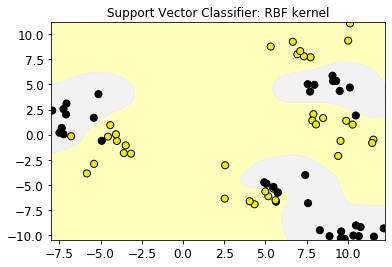

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


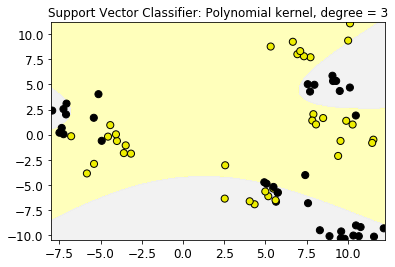

In [10]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

clf1 = SVC(max_iter=10000).fit(X_train, y_train)
y_pred = clf1.predict(X_test)

result_metrics = classification_report(y_test, y_pred)
print('RBF kernel (Gaussian) results\n', result_metrics)


clf2 = SVC(kernel='poly', max_iter=10000).fit(X_train, y_train)
y_pred = clf2.predict(X_test)

result_metrics = classification_report(y_test, y_pred)
print('Polynomial kernel results\n', result_metrics)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

### Support Vector Machine with RBF kernel: gamma parameter

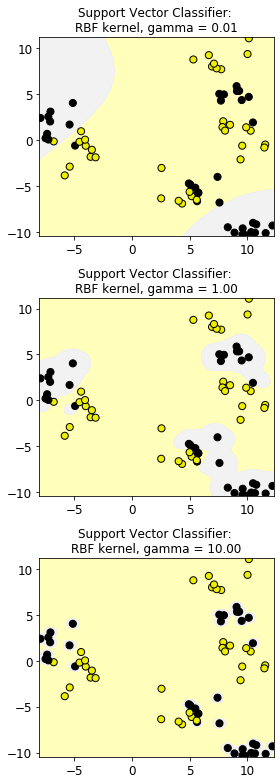

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

### Support Vector Machine with RBF kernel: using both C and gamma parameter

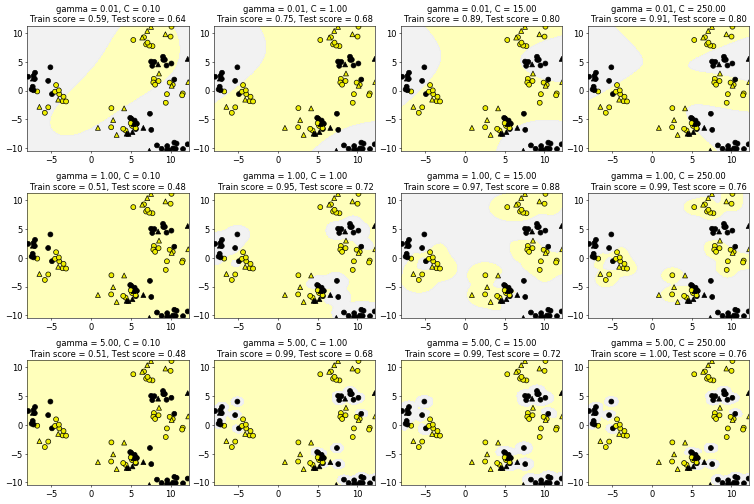

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### Application of SVMs to a real dataset: unnormalized data¶

In [13]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)

print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.63


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Application of SVMs to a real dataset: normalized data with feature preprocessing using minmax scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.98
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.96


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Validation curves in SVM model

### fruit dataset

In [15]:
fruits = pd.read_csv('./data/fruit_data_with_colors.txt', sep='\t', engine='python')
print(fruits.head(5))

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79


In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

X = X_fruits_2d.values
y = y_fruits_2d.values

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y, 
                                             param_name='gamma', param_range=param_range, cv=3)

print('training scores:\n', train_scores)

print('test scores:\n', test_scores)

training scores:
 [[0.48648649 0.425      0.41463415]
 [0.83783784 0.725      0.75609756]
 [0.91891892 0.9        0.92682927]
 [1.         1.         0.97560976]]
test scores:
 [[0.45454545 0.31578947 0.33333333]
 [0.81818182 0.68421053 0.61111111]
 [0.40909091 0.84210526 0.66666667]
 [0.36363636 0.21052632 0.38888889]]


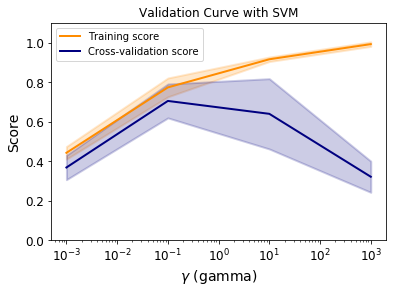

In [17]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

## TW8

Part 1:

1. Choose a dataset for binary classification (you can choose one of class example datasets or one of the datasets you worked for Phase2 of the group project. The latter would be preferred). 

2. Apply SVM linear kernel (basically no kernel) and print the performance metrics.

3. Apply SVM RBF kernel (Gaussian kernel) and print the performance metrics with non-normalized dataset.

4. Apply SVM RBF kernel with normalized dataset.

5. Apply SVM RBF kernel using varying C and gamma parameter values. 


Part 2:

- Write a short comparisons of SVM linear kernel and RBF kernel.

- Write a short summary of how C and gamma parameters play in SVM RBF kernel. 


Submissions:

- Provide a link to the notebook on Github.

- Submit your writings for Part 2 on Canvas. 

In [26]:
allPlayers = pd.read_csv('./data/season_stats.csv')

In [31]:
feature_columns = ['G', 'PER', 'TS%', 'FTr', 'TRB%', 'AST%', 
                   'STL%', 'BLK%', 'TOV%', 'USG%', 'WS', 'BPM',
                   'VORP', 'FG', 'FGA', 'FG%','3P', '3PA', '3P%',
                   'FT', 'FTA','RPG', 'APG', 'SPG', 'BPG', 
                   'PPG', 'MVP Awards', '1st Team', '2nd Team', '3rd Team', 
                   'All-NBA Teams', 'All Star Selections']
X = allPlayers[feature_columns]
y = allPlayers['isHOF']
target_names = ['Not HOF','Is HOF']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
this_C = 1.0

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C, max_iter=1000).fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    result_metrics = classification_report(y_test, y_pred)
    print(result_metrics)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       951
         1.0       0.75      0.21      0.32        29

    accuracy                           0.97       980
   macro avg       0.86      0.60      0.66       980
weighted avg       0.97      0.97      0.97       980

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96       951
         1.0       0.25      0.62      0.35        29

    accuracy                           0.93       980
   macro avg       0.62      0.78      0.66       980
weighted avg       0.97      0.93      0.95       980



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' 

RBF kernel (Gaussian) results
               precision    recall  f1-score   support

           0       0.68      1.00      0.81        13
           1       1.00      0.50      0.67        12

    accuracy                           0.76        25
   macro avg       0.84      0.75      0.74        25
weighted avg       0.84      0.76      0.74        25

Polynomial kernel results
               precision    recall  f1-score   support

           0       0.57      0.31      0.40        13
           1       0.50      0.75      0.60        12

    accuracy                           0.52        25
   macro avg       0.54      0.53      0.50        25
weighted avg       0.54      0.52      0.50        25



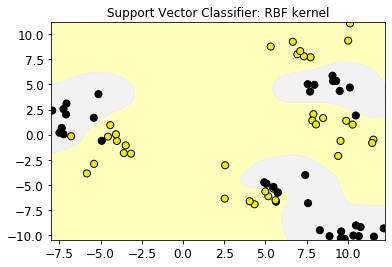

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


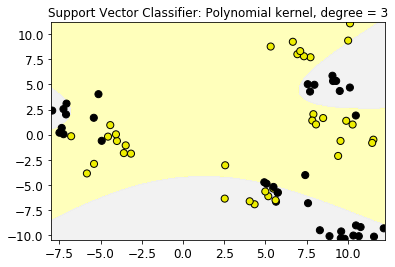

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

clf1 = SVC(max_iter=10000).fit(X_train, y_train)
y_pred = clf1.predict(X_test)

result_metrics = classification_report(y_test, y_pred)
print('RBF kernel (Gaussian) results\n', result_metrics)


clf2 = SVC(kernel='poly', max_iter=10000).fit(X_train, y_train)
y_pred = clf2.predict(X_test)

result_metrics = classification_report(y_test, y_pred)
print('Polynomial kernel results\n', result_metrics)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

In [39]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
normalized_data = pd.DataFrame(x_scaled)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0)

In [42]:
clf1 = SVC(max_iter=10000).fit(X_train, y_train)
y_pred = clf1.predict(X_test)

result_metrics = classification_report(y_test, y_pred)
print('RBF kernel (Gaussian) results\n', result_metrics)


clf2 = SVC(kernel='poly', max_iter=10000).fit(X_train, y_train)
y_pred = clf2.predict(X_test)

result_metrics = classification_report(y_test, y_pred)
print('Polynomial kernel results\n', result_metrics)


RBF kernel (Gaussian) results
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       951
         1.0       0.78      0.24      0.37        29

    accuracy                           0.98       980
   macro avg       0.88      0.62      0.68       980
weighted avg       0.97      0.98      0.97       980

Polynomial kernel results
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       951
         1.0       0.00      0.00      0.00        29

    accuracy                           0.97       980
   macro avg       0.49      0.50      0.49       980
weighted avg       0.94      0.97      0.96       980



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


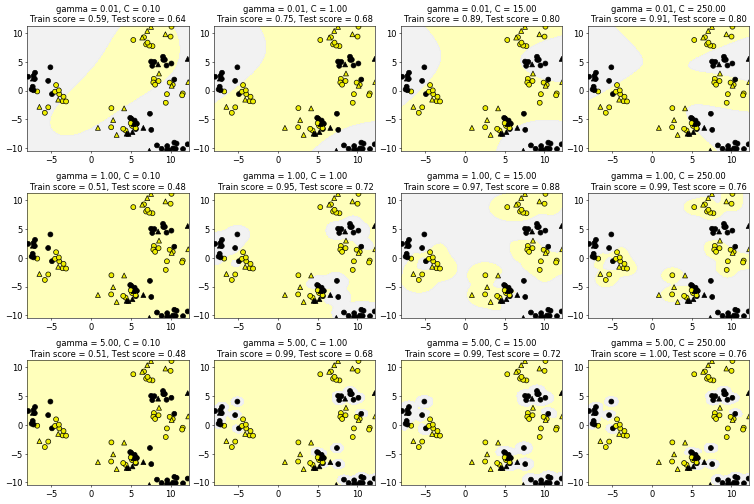

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)